# An Introduction to Optimal Control and the Pontryagin Principle

This article aims to introduce the basics of *Optimal Control Theory* by discussing the Lotka-Volterra model, also known as the predator-prey model. The model in its original form describes the interaction between two species namely, predator and prey. Predatory populations can only grow if there is enough prey, so while there is a sufficient supply in prey the predators can grow in numbers. However, an increasing number in predators also leads to a decline in prey, since they might not be able to reproduce fast enough. The dynamics of the model can be represented as a system of non-linear first order differential equations given by
\begin{align*}
&\frac{\partial}{\partial t} x_1(t) = \alpha x_1(t) - \beta x_1(t)x_2(t),\\
&\frac{\partial}{\partial t} x_2(t) = \delta x_1(t)x_2(t) - \gamma x_2(t)\\
&\text{with initial conditions}\\
&x_1(0) = a, \quad x_2(0) = b,\quad a,b\in [0,1],
\end{align*}
and $\alpha,\beta,\delta,\gamma \in (0,\infty)$.
Here, $\frac{\partial}{\partial t}x_1(t)$ can be interpreted as the change in the prey population at time $t$ and $\frac{\partial}{\partial t} x_2(t)$ as the change in the predator population at time $t$, for some $t\in [0,T], T>0$. The positive parameters $\alpha,\beta,\delta,\gamma$ describe the interaction between the two species.
In the following we will consider the explicit model
\begin{align*}
&\frac{\partial}{\partial t} x_1(t) = x_1(t) - x_1(t)x_2(t) - 0.4x_1(t),\\
&\frac{\partial}{\partial t} x_2(t) = - x_2(t) + x_1(t)x_2(t) - 0.2x_2(t) \\
&\text{with initial conditions}\\
&x_1(0) = a, \quad x_2(0) = b,\quad a,b\in [0,1],
\end{align*}
i.e., $\alpha = 0.6, \beta = \delta = 1, \gamma = 1.2$ and $T = 12$. In order to give an intuition of how this system behaves depending on the initial population values, check out the following interactive plot.

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets, Layout
%matplotlib inline

In [8]:
def model(x):
    return np.array([x[0]-x[0]*x[1]-0.4*x[0],
                     -x[1]+x[0]*x[1]-0.2*x[1]])
def plot_pp(a,b):
    t0 = 0
    tmax = 12
    sol = solve_ivp(lambda t, x:model(x), [t0, tmax], np.array([a,b]), t_eval=np.linspace(t0, tmax, 100))
    plt.subplot(1,2,1)
    plt.plot(sol.t,sol.y[0], label = 'Prey')
    plt.plot(sol.t,sol.y[1], label = 'Predator')
    plt.xlabel("time")
    plt.ylabel("population")
    plt.title("Solution of the ODE system")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(sol.y[1],sol.y[0], label = 'Prey', color = "r")
    plt.rcParams["figure.figsize"]=10,5
    plt.title("Phase portrait of the solution")
    plt.xlabel("predator population")
    plt.ylabel("prey population")

style = {'description_width': 'initial'}
layout = Layout(width = "400px")
slid1 = widgets.FloatSlider(description = 'Initial Prey Population',min=0, max=1, step=0.1, value=0.5,style = style, layout = layout)
slid2 = widgets.FloatSlider(description = 'Initial Predator Population',min=0, max=1, step=0.1, value=0.7, style = style, layout = layout)
interact(plot_pp, a= slid1 ,b=slid2);


interactive(children=(FloatSlider(value=0.5, description='Initial Prey Population', layout=Layout(width='400px…

Recall that the goal is to stabilize both populations over time and eventually have both populations approaching the same value. Given the evolution of the model, the idea is to introduce some sort of control function that either additionally increases or decreases the population evolution in order achieve the goal. In our given model we can incorporate such a function as follows.
\begin{align*}
&\frac{\partial}{\partial t} x_1(t) = x_1(t) - x_1(t)x_2(t) - 0.4u(t)x_1(t),\\
&\frac{\partial}{\partial t} x_2(t) = - x_2(t) + x_1(t)x_2(t) - 0.2u(t)x_2(t) \\
&\text{with initial conditions}\\
&x_1(0) = a, \quad x_2(0) = b,\quad a,b\in [0,1],\\
&\text{and control function }\\
&u:[0,12]\to[0,1]
\end{align*}
The function $u$ taking values between $0$ and $1$ is potentially decreasing the population decline of both, predators and prey.

How does a function $u:[0,12]\to[0,1]$ actually influence the system? Let us consider an example:
Choose
\begin{equation*}
 u(t) = \begin{cases}
            0, \quad &\text{ if } t\in [0,2],\\
            1, \quad &\text{ if } t\in (2,4.5],\\
            0.5, \quad &\text{ if } t\in (4.5,7.5],\\
            0, \quad &\text{ if } t\in (7.5,12].
        \end{cases}
\end{equation*}
A visualization of the function $u$ can be found below.

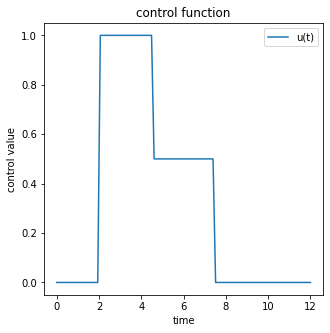

In [5]:
def u(t):
    if 0<= t <= 2:
        return 0
    elif 2< t <= 4.5:
        return 1
    elif 4.5< t <=7.5:
        return 0.5
    else:
        return 0
vu = np.vectorize(u,otypes=[np.float64])
t = np.linspace(0,12,100)

plt.plot(t,vu(t), label = 'u(t)')
plt.xlabel("time")
plt.ylabel("control value")
plt.title("control function")
plt.rcParams["figure.figsize"]=5,5
plt.legend();

The control function above is therefore decreasing the population decline whenever it takes a value in $[0,1)$ and not changing the dynamics if it takes the value $1$. The adapted system can be solved in the same fashion as before which results in different solutions depending on the starting value.

In [6]:
def model_control_ex(t,x):
    return np.array([x[0]-x[0]*x[1]-0.4*x[0]*u(t), -x[1]+x[0]*x[1]-0.2*x[1]*u(t)])
def plot_pp(a,b):
    t0 = 0
    tmax = 12
    sol = solve_ivp(lambda t, x:model_control_ex(t,x), [t0, tmax], np.array([a,b]), t_eval=np.linspace(t0, tmax, 100))
    plt.subplot(1,2,1)
    plt.plot(sol.t,sol.y[0], label = 'Prey')
    plt.plot(sol.t,sol.y[1], label = 'Predator')
    plt.xlabel("time")
    plt.ylabel("population")
    plt.title("Solution of the ODE system")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(sol.y[1],sol.y[0], label = 'Prey', color = "r")
    plt.rcParams["figure.figsize"]=10,5
    plt.title("Phase portrait of the solution")
    plt.xlabel("predator population")
    plt.ylabel("prey population")

style = {'description_width': 'initial'}
layout = Layout(width = "400px")
slid1 = widgets.FloatSlider(description = 'Initial Prey Population',min=0, max=1, step=0.1, value=0.5,style = style, layout = layout)
slid2 = widgets.FloatSlider(description = 'Initial Predator Population',min=0, max=1, step=0.1, value=0.7, style = style, layout = layout)
interact(plot_pp, a= slid1 ,b=slid2);

interactive(children=(FloatSlider(value=0.5, description='Initial Prey Population', layout=Layout(width='400px…

This explicit function $u$ is not quite satisfactory in terms of controlling the population, as both populations are far from equal at terminal time $T=12$. This is due to the fact that $u$ was chosen arbitrary without further constraints. In order to achieve this desired behaviors we have to pass additional restrictions on the control function and formulate an optimization problem. A first restriction is the introduction of a so-called cost function $F$ taking values in $[0,\infty)$ depending on
 $x_1$ and $x_2$. This cost function increases if the solution of the system strays further away from the values we want it to take.
One possible cost function is given by
\begin{equation*}
    F(x_1,x_2) := \int_0^{12} \|\left(x_1(t),x_2(t)\right)^\top- \left(y_0,y_0\right)^\top\|_2^2\: \mathrm{d}t,
\end{equation*}
where $y_0\in[0,1]$. If we desire for both populations to approach the value $y_0$ we need to minimize the function $F$ with respect to $u$
while also solving the initial value problem we previously established.
Approach can be formalized as follows.
\begin{align*}
    \min_{u}\;\ &\int\limits_0^{12} (x_1(t)-y_0)^2+(x_2(t)-y_0)^2\,\mathrm{d}t\\
    \text{s.t.}&\\
    &\dot x_1(t) = x_1(t) - x_1(t)x_2(t) - 0.4x_1(t)u(t),\\
    &\dot x_2(t) = -x_2(t) + x_1(t)x_2(t) - 0.2x_1(t)u(t)\\
    &\text{with initial conditions}\\
    &x_1(0)= a, \quad x_2(0)= b\\
    &\text{and control conditions}\\
    &u(t)\in [0,1]\quad \forall\,t \in [0,12].
\end{align*}

There are a number of different methods for solving the problem above. One rather simple approach we can choose is to modify the optimization problem in a way that the cost function is treated as an additional variable to our system.
Define $x_3(t) := F(x_1(t),x_2(t))$, then as a results we obtain an equivalent optimization problem
\begin{align*}
 \min_{u}\;\ &x_3(t)\\
    \text{s.t.}&\\
    &\dot x_1(t) = x_1(t) - x_1(t)x_2(t) - 0.4x_1(t)u(t),\\
    &\dot x_2(t) = -x_2(t) + x_1(t)x_2(t) - 0.2x_1(t)u(t)\\
    &\dot x_3(t) = (x_1(t)-y_0)^2+(x_2(t)-y_0)^2\\
    &\text{with boundary conditions}\\
    &x_1(0)= a, \quad x_2(0)= b,\quad x_3(0) = 0,\\
    &x_1(12)= y_0, \quad x_2(12)= y_0,\quad x_3(12) = 0,\\
    &\text{and control conditions}\\
    &u(t)\in [0,1]\quad \forall\,t \in [0,12].
\end{align*}
Optimization problems of this nature can be solved in python by using the `gekko` package.

In [7]:
from gekko import GEKKO

In [8]:
m = GEKKO(remote = False)
n = 100
T = 12
m.time = np.linspace(0,T,n)
a = 0.2; b=0.5; y0 = 1

x1 = m.Var(value = a)
x2 = m.Var(value = b)
x3 = m.Var(value = (a-y0)**2 + (b-y0)**2)
u = m.Var(value = 0, lb = -1, ub = 1)
p = np.zeros(n)
p[-1] = T
final = m.Param(value = p)

m.Equation(x1.dt()==x1-x1*x2-0.4*x1*u)
m.Equation(x2.dt()==-x2+x1*x2-0.2*x1*u)
m.Equation(x3.dt()==(x1-y0)**2+(x2-y0)**2)

m.Obj(x3)
m.options.IMODE = 6 # optimal control mode

In [9]:
def plot_pp(a,b):
    m = GEKKO(remote = True)
    n = 100
    T = 12
    m.time = np.linspace(0,T,n)
    y0 = 1

    x1 = m.Var(value = a)
    x2 = m.Var(value = b)
    x3 = m.Var(value = (a-y0)**2 + (b-y0)**2)
    u = m.Var(value = 0, lb = 0, ub = 1)
    p = np.zeros(n)
    p[-1] = T

    m.Equation(x1.dt()==x1-x1*x2-0.4*x1*u)
    m.Equation(x2.dt()==-x2+x1*x2-0.2*x1*u)
    m.Equation(x3.dt()==(x1-y0)**2+(x2-y0)**2)

    m.Obj(x3)
    m.options.IMODE = 6 # optimal control mode
    
    m.solve(disp=False)
    plt.subplot(1,2,1)
    plt.plot(m.time,x1.value, label = 'Prey')
    plt.plot(m.time,x2.value, label = 'Predator')
    plt.xlabel("time")
    plt.ylabel("population")
    plt.title("Solution to the control problem with $y_0$ =%.1f" %y0)
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(m.time,u.value, color = "r")
    plt.rcParams["figure.figsize"]=10,5
    plt.title("Control function values")
    plt.xlabel("time")
    plt.ylabel("control value")

style = {'description_width': 'initial'}
layout = Layout(width = "400px")
slid1 = widgets.FloatSlider(description = 'Initial Prey Population $a$',min=0.4, max=0.8, step=0.05, value=0.5,style = style, layout = layout)
slid2 = widgets.FloatSlider(description = 'Initial Predator Population $b$',min=0.4, max=0.8, step=0.05, value=0.5, style = style, layout = layout)
interact(plot_pp, a= slid1 ,b=slid2);


interactive(children=(FloatSlider(value=0.5, description='Initial Prey Population $a$', layout=Layout(width='4…